Todo:
- Kolik zahraničních a kolik českých jmen se ve zkoumaným období protočilo v rádiích (tipuju že českých bude výrazně míň > z českých imho točíme dokola léta ta samá jména jen třeba s novýma písničkama)

In [1]:
import os
import pandas as pd

In [2]:
df = pd.read_csv(os.path.join("data","CZ_RADIO_TOP_100_tydenni.csv"))
wikid = pd.read_json(os.path.join("wikidata","wikidata.json"))
df = df.merge(wikid, on="interpret_hlavni", how="outer")

## Co v těch datech vlastně máme

In [3]:
df[['interpret_hlavni','zeme_puvodu']].sample(10)

,interpret_hlavni,zeme_puvodu
26928,Mandrage,Česko
27602,David Guetta,Francie
67523,Slza,Česko
34092,Laurent Wolf,NaN
35302,Marek Ztracený,Česko
87636,Purple Disco Machine,Německo
85724,R3Hab,Nizozemsko
17736,Ne-Yo,Spojené státy americké
89838,Maneskin,Itálie
87243,Joel Corry,Spojené království


In [4]:
len(df[~df['zeme_puvodu'].isnull()]) / len(df)

0.859831214379658

To je slušný.

## Nejzastoupenější země

In [5]:
df.groupby('zeme_puvodu').size().nlargest(20)

zeme_puvodu
Spojené státy americké     22361
Česko                      19483
Spojené království         13679
Kanada                      2598
Německo                     2324
Francie                     2204
Švédsko                     2071
Slovensko                   1896
Austrálie                   1283
Nizozemsko                  1135
Španělsko                    951
Barbados                     768
Belgie                       693
Irsko                        592
Švýcarsko                    513
Kolumbie                     492
Finsko                       465
Rumunsko                     428
Braniborské markrabství      394
Itálie                       378
dtype: int64

In [6]:
def pomer(x, y):
    return (df[(df['zeme_puvodu'] == x) & (df['pozice'] <= y)].groupby('rok').size() / df[(~df['zeme_puvodu'].isnull()) & (df['pozice'] <= y)].groupby('rok').size()).plot.bar()

<Axes: xlabel='rok'>

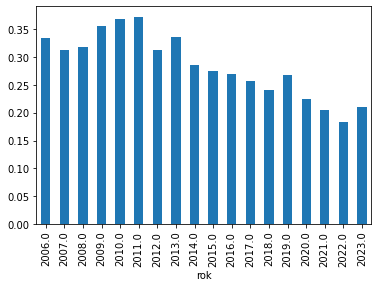

In [7]:
pomer('Spojené státy americké', 100)

<Axes: xlabel='rok'>

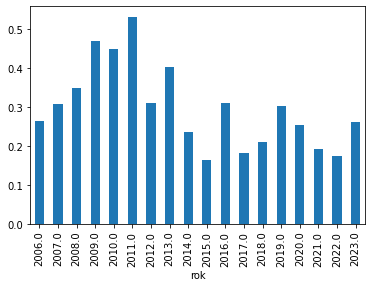

In [8]:
pomer('Spojené státy americké', 10)

<Axes: xlabel='rok'>

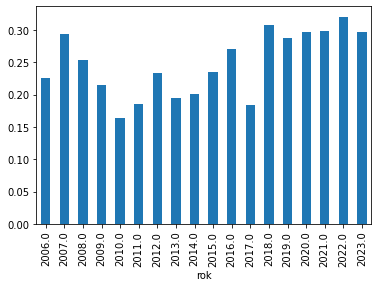

In [9]:
pomer('Česko', 100)

<Axes: xlabel='rok'>

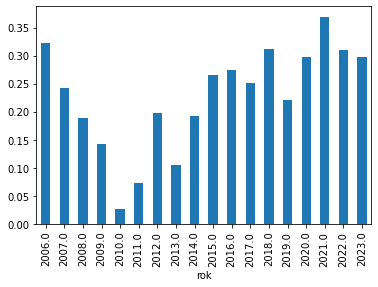

In [10]:
pomer('Česko', 10)

<Axes: xlabel='rok'>

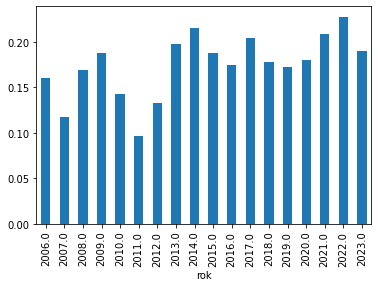

In [11]:
pomer('Spojené království', 100)

<Axes: xlabel='rok'>

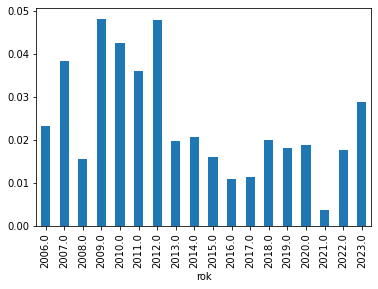

In [12]:
pomer('Slovensko', 100)

<Axes: xlabel='rok'>

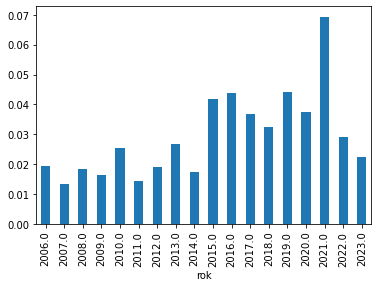

In [13]:
pomer('Německo', 100)

## Jak se točí domácí x zahraniční

In [14]:
df[~df['zeme_puvodu'].isnull() & (df['zeme_puvodu'] == "Česko")].groupby('interpret_hlavni')['track'].nunique().mean()

2.9731543624161074

In [15]:
df[~df['zeme_puvodu'].isnull() & (df['zeme_puvodu'] != "Česko")].groupby('interpret_hlavni')['track'].nunique().mean()

3.3134146341463415

## Délka kariér

In [16]:
top_zeme = df.explode('zeme_puvodu').groupby('zeme_puvodu').size().nlargest(10).index.to_list()

In [17]:
df['delka_pusobeni'] = df['rok'] - df['zacatek_pusobeni']

In [18]:
df[df['zeme_puvodu'].isin(top_zeme)].groupby('zeme_puvodu')['delka_pusobeni'].mean().sort_values().head(60)

zeme_puvodu
Německo                    8.629206
Spojené království         9.794620
Švédsko                    9.866796
Kanada                    10.374465
Austrálie                 12.949099
Spojené státy americké    13.264935
Nizozemsko                14.010591
Česko                     16.885559
Slovensko                 18.902149
Francie                   19.045847
Name: delka_pusobeni, dtype: float64

Nejosvědčenější zřejmě musí být interpreti ze Slovenska, naopak ze Spojeného království je přebíráme relativně krátce po založení.

Bacha! Nemůže to nějak zkreslovat to, že jsou data až od roku 2006?

## Brno x Praha

In [19]:
len(df[df['misto_puvodu'] == 'Brno']) / len(df[df['misto_puvodu'] == 'Praha'])

0.04655493482309125

Velmi disproporční, podobně jako u filmu, ale na tahle data bych pro velké soudy nespoléhal :/

## Versus žánry

In [20]:
zanryxmista = df.explode('zanry').explode('zeme_puvodu')
zanryxmista = zanryxmista[['zanry','zeme_puvodu']].dropna()

Vyřazuji z toho pop.

In [21]:
pd.DataFrame(zanryxmista[~zanryxmista['zanry'].str.contains('pop',na=False)].groupby(['zeme_puvodu','zanry']).size().nlargest(30)).rename(columns={0:'count'})

count
zeme_puvodu            zanry                            
Spojené státy americké hip hop                      7250
                       contemporary R&B             6637
                       alternativní rock            4666
                       rock                         3758
Česko                  rock                         3155
Spojené státy americké elektronická taneční hudba   2566
                       taneční hudba                2232
                       soul                         2049
                       rhythm and blues             1898
Spojené království     alternativní rock            1835
Spojené státy americké reggae                       1728
Spojené království     soft rock                    1714
Česko                  alternativní rock            1688
Spojené státy americké elektronická hudba           1668
Spojené království     contemporary R&B             1547
                       rock                         1522
Spojené státy americké trap                         1504
                       electro house                1402
                       country                      1289
                       funk                         1288
Spojené království     soul                         1267
Spojené státy americké house music                  1254
Spojené království     hip hop                      1242
                       house music                  1218
Spojené státy americké Southern hip hop             1182
                       gospel                       1178
Spojené království     rhythm and blues             1175
Spojené státy americké reggaeton                    1157
                       hip house                    1155
                       dirty south                  1145